In [78]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

    invalid_path='/opt/ros/kinetic/lib/python2.7/dist-packages'
    if invalid_path in sys.path:
        sys.path.remove(invalid_path)

In [79]:
## Import libraries need to be imported, Dont forget to update requirements.txt!
import os
import sys
IntialiseEnv()
import numpy as np
import cv2
import skimage.color
import skimage.filters
import skimage.io
import matplotlib.pyplot as plt
import import_ipynb
from Data_Preparation.Data_Preparation import *

In [80]:
## Sharpen Image
def sharpen(img):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    im = cv2.filter2D(img, -1, kernel)
    plt.imshow(im)
    return im

In [81]:
# Excessive sharpening image
def excessive(img):
    kernel = np.array([[1,1,1], [1,-7,1], [1,1,1]])
    im = cv2.filter2D(img, -1, kernel)
    return im

In [82]:
# Blur of images
def blur(img):
    blur =  cv2.medianBlur(img,5)
    return blur

In [147]:
# Edge Enhancement
def edgeEnhancement(img):
    kernel = np.array([[-1,-1,-1,-1,-1],
                               [-1,2,2,2,-1],
                               [-1,2,8,2,-1],
                               [-2,2,2,2,-1],
                               [-1,-1,-1,-1,-1]])/8.0
    img = cv2.filter2D(img, -1, kernel)
    image=cv2.filter2D(img, -1, kernel)
    return image

In [148]:
# Weight image with another image
def addWeightedImg(img,blur):
    result = cv2.addWeighted(img, 1, blur, -0.5, 0)
    return result

In [149]:
# Contrast Enhancement
def ContrastEnhancement():
    hsvImg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsvImg[...,1] = hsvImg[...,1]*1.6
    hsvImg[...,2] = hsvImg[...,2]*0.8
    img=cv2.cvtColor(hsvImg,cv2.COLOR_HSV2RGB)

In [150]:
#Edge Detection
def CannyEdgeDetection(img):
    edged=cv2.Canny(img,60,150)

In [151]:
# Find Contours
def FindContours(edged):
    contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(img,contours,-1,(0,255,0),1)
    ret =40
    img[img>ret]=255
    img[img<=ret]=0
    img =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [152]:
def Convert2Grayscale(img):
    return skimage.color.rgb2gray(img)

In [153]:
def ThresholdSegmentationOtsu(img):
    t = skimage.filters.threshold_otsu(img)
    mask = img > t
    return mask

In [154]:
def RemoveNoiseColouredImg(img):
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

In [168]:
def ProposedSegmentationAlgo(path):
    img=loadSampleImg(path)
    img_to_yuv = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2RGB)
    edgeEnhanced=edgeEnhancement(hist_equalization_result)
    gray= Convert2Grayscale(edgeEnhanced)
    segmentedImg=ThresholdSegmentationOtsu(gray)
    fig, ax = plt.subplots(nrows=1, ncols=5)
    ax[0].imshow(img)
    ax[1].imshow(hist_equalization_result)
    ax[2].imshow(edgeEnhanced)
    ax[3].imshow(gray)
    ax[4].imshow(segmentedImg)
    plt.show() 

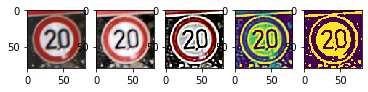

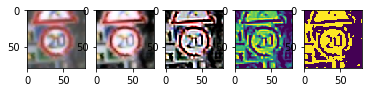

In [169]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00000/00000_00024.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00000/00000_00000.ppm')

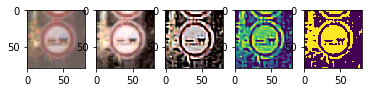

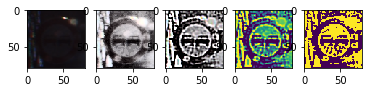

In [157]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00009/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00009/00047_00026.ppm')

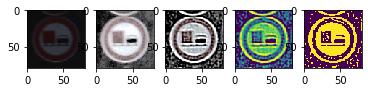

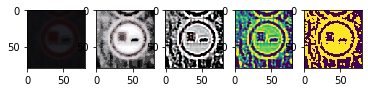

In [158]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00010/00007_00024.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00010/00008_00012.ppm')

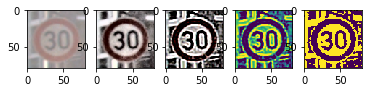

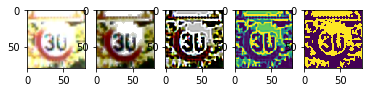

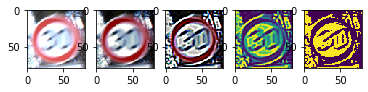

In [161]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00001/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00001/00001_00008.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00001/00042_00029.ppm')

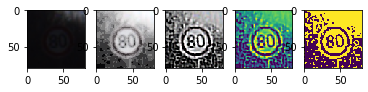

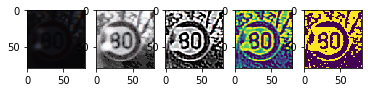

In [163]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00011_00006.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00010_00026.ppm')

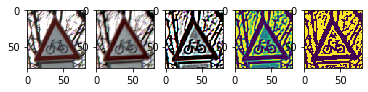

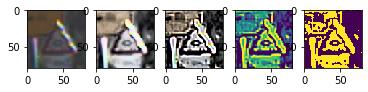

In [165]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00029/00004_00028.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00029/00006_00002.ppm')